Sebastian Raschka, 2015  
`mlxtend`, a library of extension and helper modules for Python's data analysis and machine learning libraries

- GitHub repository: https://github.com/rasbt/mlxtend
- Documentation: http://rasbt.github.io/mlxtend/

View this page in [jupyter nbviewer](http://nbviewer.ipython.org/github/rasbt/mlxtend/blob/master/docs/sources/_ipynb_templates/regressor/linear_regression.ipynb)

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v -p matplotlib,numpy,scipy,mlxtend

Sebastian Raschka 
last updated: 2016-02-22 

CPython 3.5.1
IPython 4.0.3

matplotlib 1.5.1
numpy 1.10.4
scipy 0.17.0
mlxtend 0.3.1.dev0


In [2]:
%matplotlib inline

# EnsembleVoteClassifier

Implementation of a majority voting `EnsembleVoteClassifier` for classification.

> from mlxtend.classifier import EnsembleVoteClassifier

# Overview

The `EnsembleVoteClassifier` is a meta-classifier for combining similar or conceptually different machine learning classifiers for classification via majority or plurality voting. (For simplicity, we will refer to both majority and plurality voting as majority voting.)


![](./EnsembleVoteClassifier_files/voting.png)


The `EnsembleVoteClassifier` implements "hard" and "soft" voting. In hard voting, we predict the final class label as the class label that has been predicted most frequently by the classification models. In soft voting, we predict the class labels by averaging the class-probabilities (only recommended if the classifiers are well-calibrated).

![](./EnsembleVoteClassifier_files/majority_voting.png)



**Note**

If you are interested in using the <code>EnsembleVoteClassifier</code>, please note that it is now also available through scikit learn (>0.17) as <a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html"><code>VotingClassifier</code></a>.

### Majority Voting / Hard Voting

Hard voting is the simplest case of majority voting. Here, we predict the class label $\hat{y}$ via majority (plurality) voting of each classifier $C_j$:

$$\hat{y}=mode\{C_1(\mathbf{x}), C_2(\mathbf{x}), ..., C_m(\mathbf{x})\}$$





Assuming that we combine three classifiers that classify a training sample as follows:

- classifier 1 -> class 0
- classifier 2 -> class 0
- classifier 3 -> class 1

$$\hat{y}=mode\{0, 0, 1\} = 0$$

Via majority vote, we would we would classify the sample as "class 0."

### Weighted Majority Vote

In addition to the simple majority vote (hard voting) as described in the previous section, we can compute a weighted majority vote by associating a weight $w_j$ with classifier $C_j$:

$$\hat{y} = \arg \max_i \sum^{m}_{j=1} w_j \chi_A \big(C_j(\mathbf{x})=i\big),$$

where $\chi_A$ is the characteristic function $[C_j(\mathbf{x}) = i \; \in A]$, and $A$ is the set of unique class labels. 

Continuing with the example from the previous section

- classifier 1 -> class 0
- classifier 2 -> class 0
- classifier 3 -> class 1

assigning the weights \{0.2, 0.2, 0.6\} would yield a prediction $\hat{y} = 1$:

$$\arg \max_i [0.2 \times i_0 + 0.2 \times i_0 + 0.6 \times i_1] = 1$$

### Soft Voting

In soft voting, we predict the class labels based on the predicted probabilities $p$ for classifier -- this approach is only recommended if the classifiers are well-calibrated.

$$\hat{y} = \arg \max_i \sum^{m}_{j=1} w_j p_{ij},$$

where $w_j$ is the weight that can be assigned to the $j$th classifier.

Assuming the example in the previous section was a binary classification task with class labels $i \in \{0, 1\}$, our ensemble could make the following prediction:

- $C_1(\mathbf{x}) \rightarrow [0.9, 0.1]$
- $C_2(\mathbf{x}) \rightarrow [0.8, 0.2]$
- $C_3(\mathbf{x}) \rightarrow [0.4, 0.6]$

Using uniform weights, we compute the average probabilities:

$$p(i_0 \mid \mathbf{x}) = \frac{0.9 + 0.8 + 0.4}{3} = 0.7 \\\\
p(i_1 \mid \mathbf{x}) = \frac{0.1 + 0.2 + 0.6}{3} = 0.3$$

$$\hat{y} = \arg \max_i \big[p(i_0 \mid \mathbf{x}), p(i_1 \mid \mathbf{x}) \big] = 0$$

However, assigning the weights \{0.1, 0.1, 0.8\} would yield a prediction $\hat{y} = 1$:
    
$$p(i_0 \mid \mathbf{x}) = {0.1 \times 0.9 + 0.1 \times 0.8 + 0.8 \times  0.4} = 0.49 \\\\
p(i_1 \mid \mathbf{x}) = {0.1 \times 0.1 + 0.2 \times 0.1 + 0.8 \times 0.6} = 0.51$$

$$\hat{y} = \arg \max_i \big[p(i_0 \mid \mathbf{x}), p(i_1 \mid \mathbf{x}) \big] = 1$$

### References


- [1] S. Raschka. [Python Machine Learning](https://github.com/rasbt/python-machine-learning-book). Packt Publishing Ltd., 2015.

# Examples

## Example 1 -  Classifying Iris Flowers Using Different Classification Models

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

In [3]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import numpy as np

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

print('5-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3], ['Logistic Regression', 'Random Forest', 'Naive Bayes']):

    scores = cross_validation.cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.90 (+/- 0.05) [Logistic Regression]
Accuracy: 0.93 (+/- 0.05) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [Naive Bayes]


In [4]:
from mlxtend.classifier import EnsembleVoteClassifier

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

for clf, label in zip([clf1, clf2, clf3, eclf], ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']):

    scores = cross_validation.cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.90 (+/- 0.05) [Logistic Regression]
Accuracy: 0.93 (+/- 0.05) [Random Forest]
Accuracy: 0.91 (+/- 0.04) [Naive Bayes]
Accuracy: 0.95 (+/- 0.05) [Ensemble]


#### Plotting Decision Regions

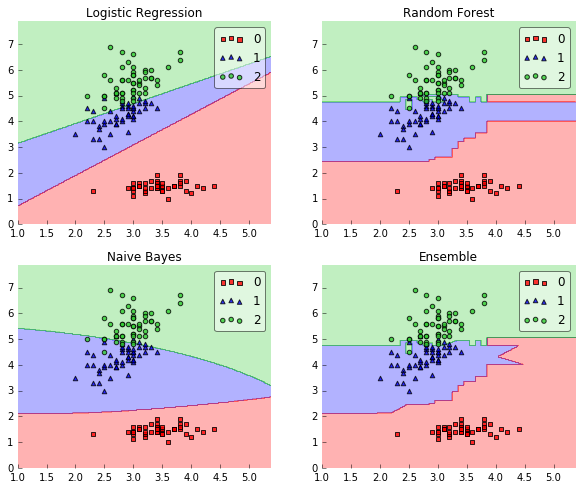

In [5]:
import matplotlib.pyplot as plt
from mlxtend.evaluate import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([clf1, clf2, clf3, eclf],
                         ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble'],
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf)
    plt.title(lab)

## Example 2 - Grid Search

In [6]:
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

In [7]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], voting='soft')

params = {'logisticregression__C': [1.0, 100.0],
          'randomforestclassifier__n_estimators': [20, 200],}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid.fit(iris.data, iris.target)

for params, mean_score, scores in grid.grid_scores_:
    print("%0.3f (+/-%0.03f) for %r"
        % (mean_score, scores.std() / 2, params))

0.953 (+/-0.013) for {'logisticregression__C': 1.0, 'randomforestclassifier__n_estimators': 20}
0.960 (+/-0.012) for {'logisticregression__C': 1.0, 'randomforestclassifier__n_estimators': 200}
0.960 (+/-0.012) for {'logisticregression__C': 100.0, 'randomforestclassifier__n_estimators': 20}
0.953 (+/-0.017) for {'logisticregression__C': 100.0, 'randomforestclassifier__n_estimators': 200}


**Note**: If the `EnsembleClassifier` is initialized with multiple similar estimator objects, the estimator names are modified with consecutive integer indices, for example:

In [8]:
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf1, clf2], voting='soft')

params = {'logisticregression-1__C': [1.0, 100.0],
          'logisticregression-2__C': [1.0, 100.0],
          'randomforestclassifier__n_estimators': [20, 200],}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid = grid.fit(iris.data, iris.target)

# API

In [3]:
with open('../../api_modules/mlxtend.classifier/EnsembleVoteClassifier.md', 'r') as f:
    print(f.read())

## EnsembleVoteClassifier

*EnsembleVoteClassifier(clfs, voting='hard', weights=None, verbose=0)*

Soft Voting/Majority Rule classifier for scikit-learn estimators.

**Parameters**

- `clfs` : array-like, shape = [n_classifiers]

    A list of classifiers.
    Invoking the `fit` method on the `VotingClassifier` will fit clones
    of those original classifiers that will
    be stored in the class attribute
    `self.clfs_`.

- `voting` : str, {'hard', 'soft'} (default='hard')

    If 'hard', uses predicted class labels for majority rule voting.
    Else if 'soft', predicts the class label based on the argmax of
    the sums of the predicted probalities, which is recommended for
    an ensemble of well-calibrated classifiers.

- `weights` : array-like, shape = [n_classifiers], optional (default=`None`)

    Sequence of weights (`float` or `int`) to weight the occurances of
    predicted class labels (`hard` voting) or class probabilities
    before averaging (`soft` voting). Uses unifor